In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
import re

In [2]:
with pdfplumber.open("Invoice.pdf") as pdf_file:
    data = []    
    for i in range(0, len(pdf_file.pages)):
        page_data = pdf_file.pages[i]
        data.append(page_data.extract_text())

In [3]:
Incidentals = []
for i in range(0,len(data)):
    text_list = data[i].split('\n') # split lines using \n escape char
    Ientries = [e for e in text_list if "Incid" in e]
    Incidentals = Incidentals + Ientries

# Pop the clauses from the list of incidentals
Clauses = [e for e in Incidentals if not any(c.isdigit() for c in e)]
Fees = [e for e in Incidentals if any(c.isdigit() for c in e)]

In [4]:
df = None
for i in range(0,len(Fees)):
    '''Create categories and text field fillings
    Copnvert the text values from fees list into dict
    The dictionary will be used to make a pandas df
    '''

    # Create some categories
    fee_cats = Fees[i].split(' ')[1].split(':')

    # Extract Actual Fee itself
    # fee = re.findall("\d+\.\d+", Fees[i])
    fee = float(Fees[i].split('$')[1].strip(' '))

    # Extract fee description
    desc = Fees[i].strip('Incid. ')
    for cat_num in range(0,len(fee_cats)):
        desc = desc.strip(fee_cats[cat_num])
    desc = desc.split('$')[0].strip(' ').strip(':') # 1st (0) entry is description


    '''Now we can construct the dictionary'''
    my_dict = {}
    
    # Extract category fields
    for cat_num in range(0,len(fee_cats)):
        my_dict["Category " + str(cat_num)] = fee_cats[cat_num]
    
    my_dict["Fees"] = fee
    my_dict["Description"] = desc

    if df is None: # Check to see if df has been created
        df = pd.DataFrame([my_dict])

    elif df is not None:
        '''
        Since this is the case in which the dataframe has been created already
        we can simply append the data to the existing dataframe'''
        df = df.append(my_dict, ignore_index=True)
    

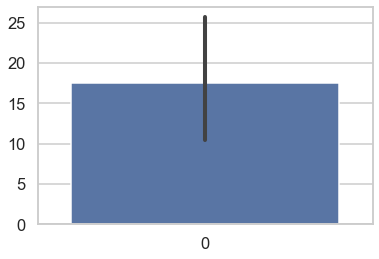

In [5]:
sns.set(style='whitegrid', context='talk')
ax = sns.barplot(data=df.Fees)
# Set up the matplotlib figure


In [25]:
def generate_breakdown_df(df,category='Category 1'):
    df = df[[category,'Fees']]
    cats = df[category].unique()
    breakdown_df = None
    my_dict = {}

    for cat in cats:
        fee_total = df.loc[df[category] == cat, 'Fees'].sum()
        fee_total = round(fee_total,2)
        # print('You pay $' + str(fee_total) + ' towards ' + str(cat))

        my_dict[str(cat)] = fee_total

  
    breakdown_df = pd.DataFrame([my_dict])
    breakdown_df = breakdown_df.T
    breakdown_df = breakdown_df.rename(columns={0:'Fees'})

    return breakdown_df

In [40]:
def groupcats(df,listcats,category):
    # listcats is a dictionary, where the key is a string of the new category,
    # the value is a list of strings of the old categories to be grouped
    # listcats = {'Engineering':['Eng.', 'Engineering', 'ES']}

    for i in listcats:
        NewName = i
        list_replace = listcats[i]
        for j in range(0, len(list_replace)):
            OldName = list_replace[j]
            df = df.replace(to_replace=OldName, value=NewName)
    
    return df

In [44]:
grouped = groupcats(df=df,listcats={'Engineering':['Eng.', 'Engineering', 'ES']},category='Category 1')
grouped_bd = generate_breakdown_df(df=grouped, category='Category 1')

pandas.core.frame.DataFrame

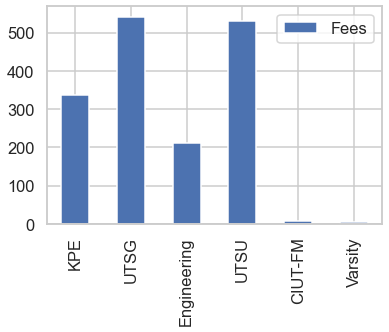

In [49]:
ax = grouped_bd.plot.bar(y='Fees')

In [9]:
 # Create some categories
fee_cats = Fees[i].split(' ')[i].split(':')

# Extract Actual Fee itself
fee = re.findall("\d+\.\d+", Fees[i])\

# Extract fee description
desc = Fees[0].strip('Incid. ')
for i in range(0,len(fee_cats)):
    desc = desc.strip(fee_cats[i])
desc = desc.split('$')[0].strip(' ').strip(':')


''' Now we can construct the dictionary'''
my_dict = {}
    
# Extract category fields
for cat_num in range(0,len(fee_cats)):
    my_dict["Category " + str(cat_num)] = fee_cats[cat_num]
    
my_dict["Fees"] = fee
my_dict["Description"] = desc

pd.DataFrame.from_dict(my_dict)

IndexError: list index out of range